<a href="https://colab.research.google.com/github/AngelaCorvino/BrainAge/blob/main/statanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

In [2]:
dataset_file = 'https://raw.githubusercontent.com/AngelaCorvino/BrainAge/main/data/FS_features_ABIDE_males.csv'
df = pd.read_csv(dataset_file,sep=';')
df['Site'] = df.FILE_ID.apply(lambda x: x.split('_')[0])
df_ASD=df.loc[df.DX_GROUP==1]
df_TD=df.loc[df.DX_GROUP==-1]

# Permutation test

we define two classes with and age treshold and we want to test if the variable difference between the mean value of CSF (CSF1.mean-CSF2.mean) on the two classes is rapresentative 

(330, 425) (132, 425)


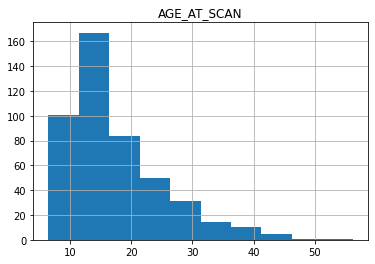

In [12]:
df_TD[df_TD.AGE_AT_SCAN>0].hist('AGE_AT_SCAN')
df_TD1 = df_TD[df_TD.AGE_AT_SCAN<20]
df_TD2 = df_TD[df_TD.AGE_AT_SCAN>20]
print(df_TD1.shape,df_TD2.shape)

In [13]:
CSF1 = df_TD1['CSF_Volume_mm3']
CSF2 = df_TD2['CSF_Volume_mm3']

In [29]:
Avg_obs_diff =CSF1.mean()-CSF2.mean()
Avg_obs_diff 

-105.30787878787885

In [30]:
n_perm = 1000
n_examples=CSF1.shape[0]+CSF2.shape[0]
n_examples

462

We want an array with the differences between the means of the CFSF volume of the two groups under the null hypothesis. With this goal we append CSF1 and CSF2 and we do a permutation on the values in ordert to mix the order of the elements of CSF_all

In [31]:
CSF_all = np.append(CSF1,CSF2)
Avg_diff_perm = []
for i in range(n_perm):
    perm_i = np.random.permutation(CSF_all)
    avg_A = perm_i[1:CSF1.shape[0]].mean() 
    avg_B = perm_i[CSF1.shape[0]:n_examples].mean()
    Avg_diff_perm = np.append(Avg_diff_perm, avg_A - avg_B)
Avg_diff_perm.shape

(1000,)

We plot the histogram with  a vertical red line indicating the measured difference between the means of the CSF volume  of the two groups groups (i.e. the difference in the mean values obtained with the correct group labels)

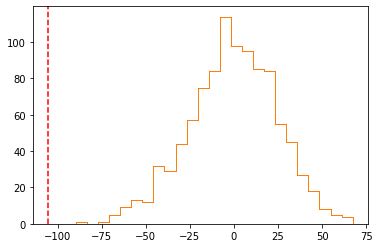

In [32]:
_ = plt.hist(Avg_diff_perm, 25, histtype='step')
plt.hist(Avg_diff_perm, 25, histtype='step')
plt.axvline(Avg_obs_diff, linestyle='--', color='red')

## Evaluation of the empirical $p$-value

We want to know if the CSF volume can be a good variable to describe the age of an healthy subject

How many of the null means are bigger than the observed value? That proportion would be the $p$-value for the null hypothesis.

$p = \frac{r+1}{N+1}$

where $N$ is the number of permutations and r is the number of times that $t_i > t_{obs}$ 

We add a 1 to the numerator and denominator to account for misestimation of the p-value (see the reference "Permutation p-values should never be zero: calculating exact P-values when permutations are randomly drawn" https://pubmed.ncbi.nlm.nih.gov/21044043/ )

In [27]:
Avg_diff_perm[abs(Avg_diff_perm) > abs(Avg_obs_diff)].shape[0]

0

In [33]:
#r = Avg_diff_perm[Avg_diff_perm > Avg_obs_diff].shape[0]
r=Avg_diff_perm[abs(Avg_diff_perm) > abs(Avg_obs_diff)].shape[0]
p_value = (r + 1 )/ (n_perm +1)
if r == 0:
  print(f'The p value is p < {p_value:.3f}')
else:
  print(f'The p value is p = {p_value:.3f}')
if p_value < 0.05:
  print('The difference between the mean weight loss of the two groups is statistically significant! ')
else:
  print('The null hypothesis cannot be rejected')

The p value is p < 0.001
The difference between the mean weight loss of the two groups is statistically significant! 
